<a href="https://colab.research.google.com/github/3madMostafa/selected_project/blob/main/Copy_of_Untitled14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🔨kaggle api

In [93]:
#import os
#os.environ ['KAGGLE_CONFIG_DIR']= '/content'

In [94]:
#!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

In [95]:
#!unzip \*.zip && rm *.zip

☀️ Importing Libraries

In [96]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import os
print(os.listdir("/content/Untitled Folder"))

['cell_images']


In [97]:
import skimage
from skimage import io

🍮Image Manipulation

In [98]:
from glob import glob
Parasitized = glob('/content/Untitled Folder/cell_images/Parasitized/*.png')

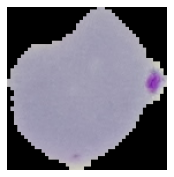

In [99]:
img = plt.imread(Parasitized[4])
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(img)
ax.axis('off')
plt.show()

🍘grayscale

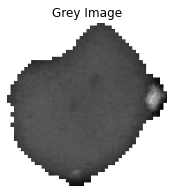

In [100]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(img_gray, cmap='Greys')
ax.axis('off')
ax.set_title('Grey Image')
plt.show()

🍚Resizing and Scaling

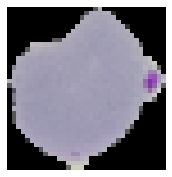

In [101]:
img_resized = cv2.resize(img, None, fx=0.25, fy=0.25)
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(img_resized)
ax.axis('off')
plt.show()

# 🍮CV2 Kernels
<img src="https://editor.analyticsvidhya.com/uploads/81269Capture.PNG" alt="imgpixels" style="width:400px;"/>

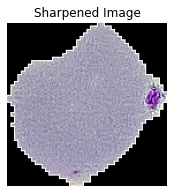

In [102]:
# Sharpen Image
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1,9,-1], 
                              [-1,-1,-1]])

sharpened = cv2.filter2D(img, -1, kernel_sharpening)

fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(sharpened)
ax.axis('off')
ax.set_title('Sharpened Image')
plt.show()

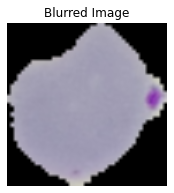

In [103]:
# Blurring the image
kernel_3x3 = np.ones((3, 3), np.float32) / 9
blurred = cv2.filter2D(img, -1, kernel_3x3)
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(blurred)
ax.axis('off')
ax.set_title('Blurred Image')
plt.show()

## 🍘Image Array
(Height, Width, Channels)

<img src="https://editor.analyticsvidhya.com/uploads/488590%20CI5wgSszZnpHu5Ip.png" alt="imgpixels" style="height: 200px; width:600px;"/>

In [156]:
x = list()
y = list()

infected = os.listdir('/content/Untitled Folder/cell_images/Parasitized/') 
uninfected = os.listdir('/content/Untitled Folder/cell_images/Uninfected/')


for i in infected:
    try:
    
        image = cv2.imread("/content/Untitled Folder/cell_images/Parasitized/"+i)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((50 , 50))
        rotated45 = resize_img.rotate(45)
        rotated75 = resize_img.rotate(75)
        blur = cv2.blur(np.array(resize_img) ,(10,10))
        x.append(np.array(resize_img))
        x.append(np.array(rotated45))
        x.append(np.array(rotated75))
        x.append(np.array(blur))
        y.append(1)
        y.append(1)
        y.append(1)
        y.append(1)
        
    except AttributeError:
        print('')
    
for u in uninfected:
    try:
        
        image = cv2.imread("/content/Untitled Folder/cell_images/Uninfected/"+u)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((50 , 50))
        rotated45 = resize_img.rotate(45)
        rotated75 = resize_img.rotate(75)
        x.append(np.array(resize_img))
        x.append(np.array(rotated45))
        x.append(np.array(rotated75))
        y.append(0)
        y.append(0)
        y.append(0)
        
    except AttributeError:
        print('')

x = np.array(x)
y = np.array(y)

Distribution of Pixel Values

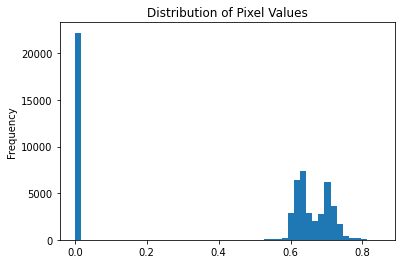

In [105]:
pd.Series(img.flatten()).plot(kind='hist',
                                  bins=50,
                                  title='Distribution of Pixel Values')
plt.show()

In [157]:
x.shape,y.shape

((96453, 50, 50, 3), (96453,))

In [158]:
z = x.reshape(x.shape[0],x.shape[1]*x.shape[2]*x.shape[3])

In [159]:
z.shape

(96453, 7500)

🍚 Splitting Dataset

In [160]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(z,y,test_size = 0.25,random_state = 42)

In [161]:
x_train.shape,y_train.dtype,x_train.dtype,y_train.shape

((72339, 7500), dtype('int64'), dtype('uint8'), (72339,))

In [162]:
x_valid, x_train = x_train[:20000], x_train[20000:]
y_valid, y_train = y_train[:20000], y_train[20000:]
x_test = x_test

In [163]:
x_train.shape,y_train.dtype,x_train.dtype,y_train.shape

((52339, 7500), dtype('int64'), dtype('uint8'), (52339,))

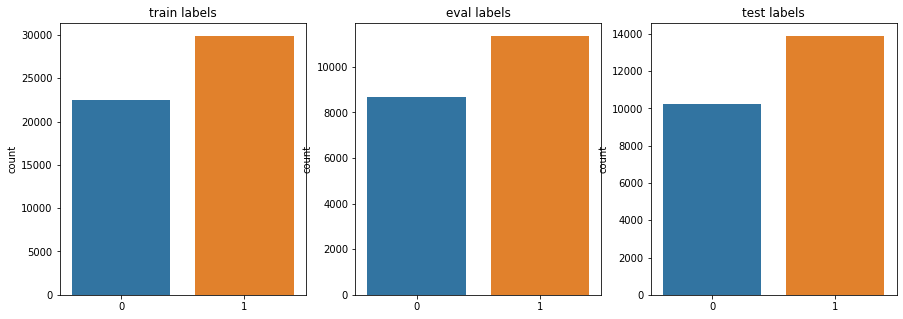

In [69]:
import seaborn as sns
plt.figure(1 , figsize = (15 ,5))
n = 0 
for z , j in zip([y_train , y_valid , y_test] , ['train labels','eval labels','test labels']):
    n += 1
    plt.subplot(1 , 3  , n)
    sns.countplot(x = z )
    plt.title(j)
plt.show()

In [70]:
y_train

array([1, 1, 1, ..., 0, 1, 1])

In [71]:
class_names = ["Uninfected", "Parasitized"]

In [72]:
class_names[y_train[0]], class_names[y_train[1]] 

('Parasitized', 'Parasitized')

🖼️sample of images

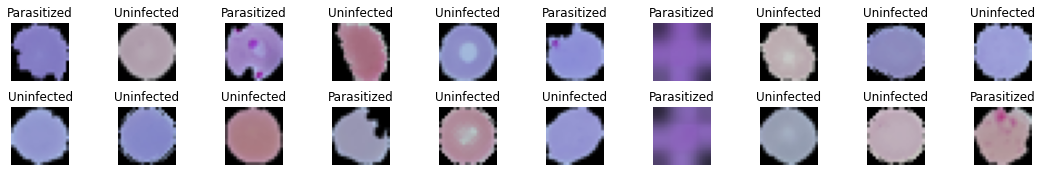

In [73]:
plt.figure(figsize = (15, 6))
plotnumber = 1
X_tr,X_te,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)
for i in range(20):
    if plotnumber <= 50:
        ax = plt.subplot(5, 10, plotnumber)
        plt.imshow(X_tr[i], cmap = 'binary')
        plt.axis('off')
        plt.title(class_names[y_train[i]], fontdict = {'fontsize'  : 12, 'color' : 'black'})
        
    plotnumber += 1
  
plt.tight_layout()
plt.show()

🔨Feature Scaling

In [74]:
#Feature Scaling
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test = sc.transform(x_test)

# ANN(Artificial Neural Network)
* The Artificial Neural Network consists of an input layer, a hidden layer, and an output layer.

![Imgur](https://elogeel.files.wordpress.com/2010/05/050510_1627_multilayerp1.png)

# Dropout
![](https://i.ibb.co/KydYCbp/d3.gif)


In [164]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten , Dropout
# model_func     
classifier = Sequential() # initialize neural network
Flatten(),
classifier.add(Dense(units = 512, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1])) # firt hidden layer 
classifier.add(Dense(units = 256, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
# 1st dropout
classifier.add(Dropout(0.2))
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
# 2nd dropout
classifier.add(Dropout(0.2))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid')) # last layer
Adam(learning_rate=0.1, name='Adam')
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [76]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 512)               8192      
                                                                 
 dense_15 (Dense)            (None, 256)               131328    
                                                                 
 dense_16 (Dense)            (None, 128)               32896     
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 flatten_5 (Flatten)         (None, 32)               

🍮Visualizing model

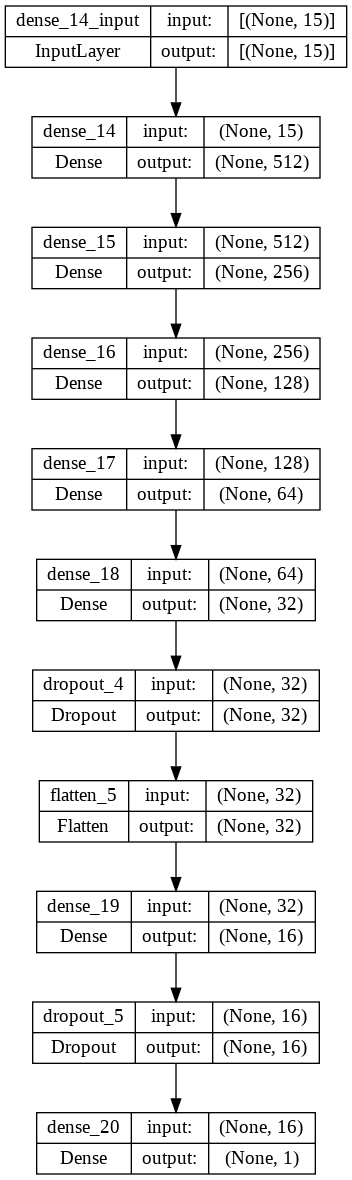

In [77]:
from tensorflow.keras.utils import plot_model

plot_model(classifier, show_shapes = True)

## Early stopping
![](https://i.ibb.co/CmJpR3R/early.png)

In [116]:
import tensorflow as tf
import keras
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                              patience=10,
                                              verbose=1,
                                              mode="auto",
                                              restore_best_weights=True
)

In [165]:
x_history = classifier.fit(x_train,y_train,batch_size=128,epochs=100,callbacks=[early_stop], validation_data = (x_valid, y_valid))

Epoch 1/100
409/409 [==============================] - 21s 49ms/step - loss: 0.5963 - accuracy: 0.6421 - val_loss: 0.5991 - val_accuracy: 0.6594
Epoch 2/100
409/409 [==============================] - 20s 48ms/step - loss: 0.5520 - accuracy: 0.6982 - val_loss: 0.5181 - val_accuracy: 0.7197
Epoch 3/100
409/409 [==============================] - 20s 48ms/step - loss: 0.5350 - accuracy: 0.7140 - val_loss: 0.5187 - val_accuracy: 0.7168
Epoch 4/100
409/409 [==============================] - 20s 48ms/step - loss: 0.5230 - accuracy: 0.7218 - val_loss: 0.5333 - val_accuracy: 0.7074
Epoch 5/100
409/409 [==============================] - 20s 49ms/step - loss: 0.5188 - accuracy: 0.7244 - val_loss: 0.5562 - val_accuracy: 0.7220
Epoch 6/100
409/409 [==============================] - 20s 48ms/step - loss: 0.5145 - accuracy: 0.7295 - val_loss: 0.5025 - val_accuracy: 0.7333
Epoch 7/100
409/409 [==============================] - 21s 51ms/step - loss: 0.5114 - accuracy: 0.7312 - val_loss: 0.5002 - val_ac

🍚evaluate

In [166]:
classifier.evaluate(x_test, y_test)

754/754 [==============================] - 7s 9ms/step - loss: 0.4819 - accuracy: 0.7462


[0.4819101393222809, 0.7462055087089539]

🍚 Visualizing Train Accuracies and Number of Epochs

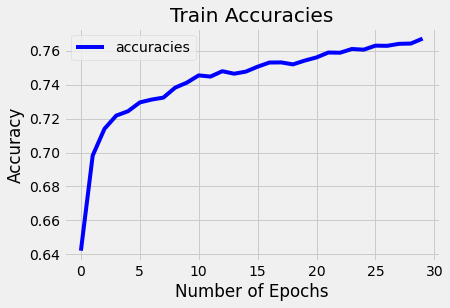

In [167]:
plt.plot(x_history.history['accuracy'], color='b', label="accuracies")
plt.title("Train Accuracies")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

🍚 Visualizing Train loss and Number of Epochs

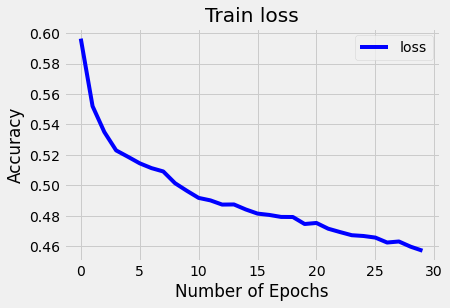

In [168]:
plt.plot(x_history.history['loss'], color='b', label="loss")
plt.title("Train loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

🍚 Visualizing 'Training loss and accuracy' and Number of Epochs

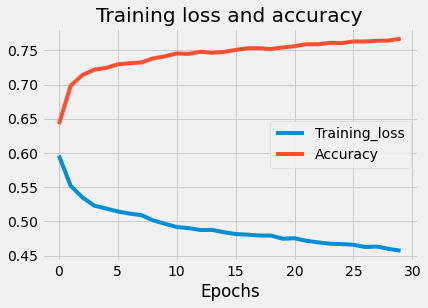

In [170]:
N=30 #epoch
plt.plot(np.arange(0,N),x_history.history['loss'],label='Training_loss')
plt.plot(np.arange(0,N),x_history.history['accuracy'],label='Accuracy')
plt.title('Training loss and accuracy')
plt.xlabel('Epochs')
plt.legend(loc='right')

Visualizing Training and Validation Loss

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


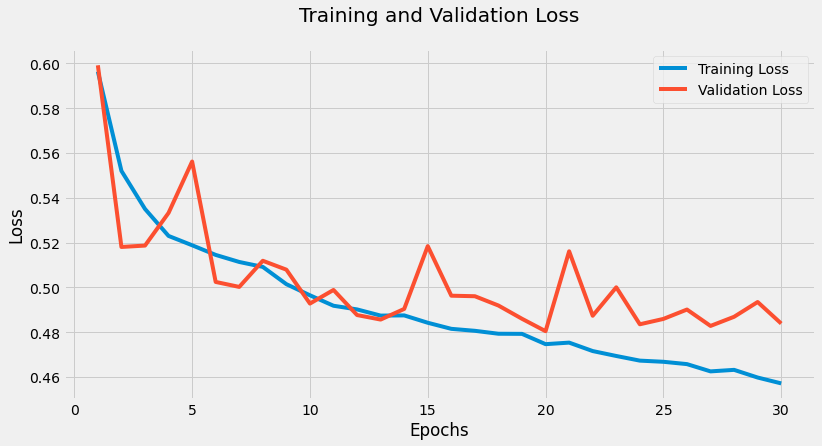

In [171]:
import seaborn as sns

plt.figure(figsize = (12, 6))
plt.style.use('fivethirtyeight')

train_loss = x_history.history['loss']
val_loss = x_history.history['val_loss'] 
epoch = range(1, 31)
sns.lineplot(epoch, train_loss, label = 'Training Loss')
sns.lineplot(epoch, val_loss, label = 'Validation Loss')
plt.title('Training and Validation Loss\n')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'best')
plt.show()

Visualizing Training and Validation accuracy

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


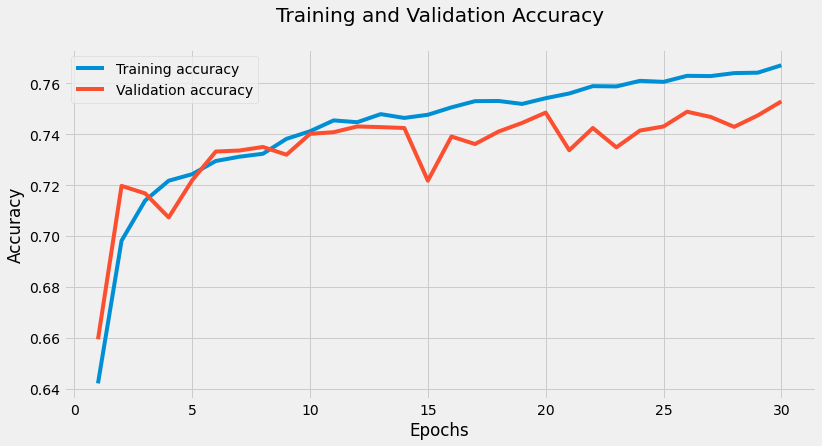

In [172]:
plt.figure(figsize = (12, 6))

train_loss = x_history.history['accuracy']
val_loss = x_history.history['val_accuracy'] 
epoch = range(1, 31)
sns.lineplot(epoch, train_loss, label = 'Training accuracy')
sns.lineplot(epoch, val_loss, label = 'Validation accuracy')
plt.title('Training and Validation Accuracy\n')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.show()

☀️predict

In [173]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

754/754 [==============================] - 7s 9ms/step


🍮 Confusion Matrix

In [174]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [175]:
cm

array([[ 7763,  2466],
       [ 3654, 10231]])

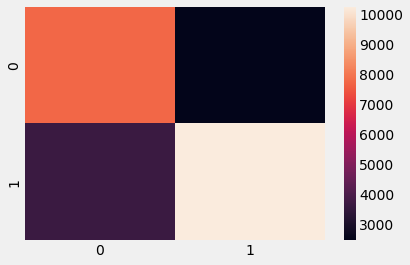

In [176]:
import seaborn as sns
sns.heatmap(cm)

🍘 save model

In [177]:
classifier.save("new.model")

🍘 classification_report

In [199]:
from sklearn.metrics import classification_report
pred = classifier.predict(x_test)
x_labels = (pred > 0.5).astype(np.int)

print(classification_report(y_test, labels))

754/754 [==============================] - 7s 9ms/step
              precision    recall  f1-score   support

           0       0.40      0.34      0.37     10229
           1       0.56      0.63      0.59     13885

    accuracy                           0.50     24114
   macro avg       0.48      0.48      0.48     24114
weighted avg       0.49      0.50      0.50     24114



<ipython-input-199-1540d512458a>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_labels = (pred > 0.5).astype(np.int)


🍘 Computing Area Under Curve (AUC)

In [200]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr_keras, tpr_keras, thresholds = roc_curve(y_test.ravel(), x_labels.ravel())
auc_keras = auc(fpr_keras, tpr_keras)
auc_keras

0.747879515170299

In [201]:
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(10,6))
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

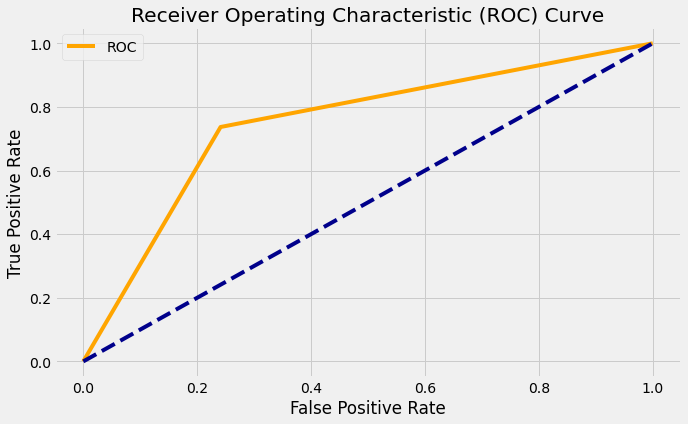

In [202]:
plot_roc_curve(fpr_keras, tpr_keras)

# svm mdel


In [179]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model_svc = SVC(kernel= 'poly',degree=3,max_iter=100,C=1.0,gamma='auto',verbose=True,random_state=32)
model_svc.fit(x_train, y_train)

[LibSVM]

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(gamma='auto', kernel='poly', max_iter=100, random_state=32, verbose=True)

In [180]:
pred = model_svc.predict(x_test)
accuracy_score(y_test, pred)

0.5031102264244837

In [181]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , pred)
print('confusion matrix \n',  cm)

confusion matrix 
 [[3451 6778]
 [5204 8681]]


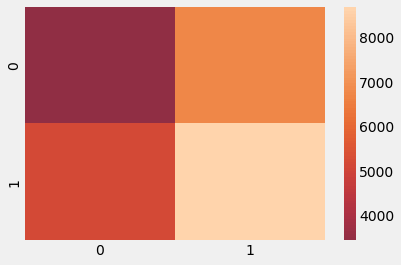

In [182]:
import seaborn as sns
sns.heatmap(cm, center=True)
plt.show()

In [192]:
from sklearn.metrics import classification_report
pred = model_svc.predict(x_test)
y_labels = (pred > 0.5).astype(np.int)

print(classification_report(y_test, labels))

              precision    recall  f1-score   support

           0       0.40      0.34      0.37     10229
           1       0.56      0.63      0.59     13885

    accuracy                           0.50     24114
   macro avg       0.48      0.48      0.48     24114
weighted avg       0.49      0.50      0.50     24114



<ipython-input-192-2a77f0c76e22>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_labels = (pred > 0.5).astype(np.int)


🍘 Computing Area Under Curve (AUC)

In [193]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr_keras, tpr_keras, thresholds = roc_curve(y_test.ravel(), y_labels.ravel())
auc_keras = auc(fpr_keras, tpr_keras)
auc_keras

0.4812905951724944

In [194]:
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(10,6))
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

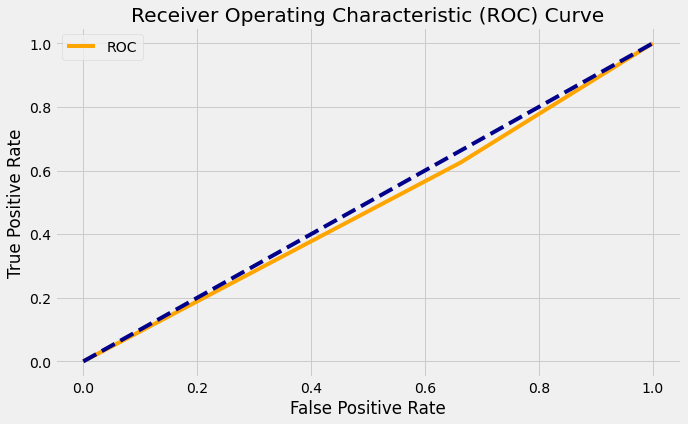

In [195]:
plot_roc_curve(fpr_keras, tpr_keras)

🖼️ model prediction

In [196]:
import tensorflow as tf
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input

#testing with custom image 
from tensorflow.keras.models import load_model
model = load_model('new.model')
m = list()
img = '/content/cell_images/Parasitized/C116P77ThinF_IMG_20150930_171809_cell_71.png'
img = io.imread(img)
image_data = cv2.resize(img,(50,50))
m.append(image_data)
m = np.array(m)

In [197]:
w = m.reshape(m.shape[0],m.shape[1]*m.shape[2]*m.shape[3])

In [198]:
y_pred = classifier.predict(w)
y_pred = (y_pred > 0.5)

if (y_pred==False):
    print('Uninfected')
else:
    print('Parasitized')

1/1 [==============================] - 0s 18ms/step
Parasitized
